<a id="9"></a>


<font color="GRAY" size=+3><b> EXCERCISE MODULE 2 </b></font>

<a id="4"></a>

---
<font color="GREEN" size=+1><b> FENNY ANGGRAINI -  DS04038 </b></font>

---

#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv
Saving penguins_size.csv to penguins_size.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv']))
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv']))

Memanggil tabel data

In [ ]:
#Memanggil tabel data
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
# Memanggil tabel study_data
study_data

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

<a id="5"></a>


<font color="PURPLE" size=+1.5><b> Melihat jumlah dataset (jumlah baris dan kolom)</b></font>

In [ ]:
data.shape

(344, 7)

In [ ]:
study_data.shape

(344, 17)

Diketahui dari dataset penguins_size memiliki 344 baris dengan 7 kolom. Dan pada dataset penguins_lter memiliki 344 baru dengan 17 kolom. Jumlah baris pada kedua dataset tersebut sama banyaknya namun jumlah kolom berbeda.

<a id="5"></a>


<font color="PURPLE" size=+1.5><b> Melihat persebaran dataset </b></font>

In [ ]:
#Melihat persebaran data secara statistik
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
#Melihat persebaran study_data secara statistik
study_data.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


<a id="5"></a>


<font color="PURPLE" size=+1.5><b> Melihat informasi dasar dari dataset </b></font>

In [ ]:
#melihat informasi dasar pada variabel data yang menampung dataset penguins_size.csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 344 baris.

In [ ]:
#Melihat informasi dasar pada variabel data yang menampung dataset penguins_lter.csv
study_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 17 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 344 baris.

Berdasarkan informasi yang ada pada kedua dataset di atas, tipe data sudah sesuai dan tepat serta dapat dilihat adanya missing value pada dataframe.

***
**Insight**
***
Berapa rata - rata body mass penguin?

In [ ]:
mean_bodym=data["body_mass_g"].mean()
print("Rata-rata dari pinguin adalah", mean_bodym, "gram")

Rata-rata dari pinguin adalah 4201.754385964912 gram


1. Data yang ada pada dataset penguins_size.csv memiliki kolom yang semuanya juga ada pada dataset penguins_lter.csv
2. Semua value dari kolom yang ada pada dataset penguins_size.csv sama dilihat dari count.

##**Handling Missing Values**

Cek jumlah missing value!

In [ ]:
#Melihat missing value yang ada pada setiap kolom dari dataset penguins_size.csv
mv = data.isnull().sum()
mv

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Pada dataset penguins_size.csv, terdapat 5 kolom yang memiliki missing value. Missing tersebut nantinya akan diatasi dengan cara - cara yang berbeda, ada yang di hapus dan ada yang di isi. Missing value pada tiap kolom diantaranya yaitu :

1. Culmen Length (mm) terdapat 2 missing
2. Culmen Depth (mm) terdapat 2 missing
3. Flipper Length (mm) terdapat 2 missing
4. Body Mass (g) terdapat 2 missing
5. Sex terdapat 10 missing

In [ ]:
# Melihat jumlah missing value semua fitur dari dataset penguins_size.csv
print("Jumlah total missing value dari dataset penguins_size adalah", mv.sum(), "data")

Jumlah total missing value dari dataset penguins_size adalah 18 data


Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [ ]:
dmv=data.dropna(subset=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g" ], axis=0)
dmv

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Dapat dilihat pada dataset penguins_size.csv setelah di lakukan drop missing value pada dataset tersebut tidak adanya lagi kolom yang memiliki nilai null. Semua nilai null/nan/kosong sudah di buang atau di drop dapat terlihat pada data 5 teratas index ke-3 yang sebelumnya berisi nilai null sudah di drop atau di hilangkan pada dataset, begitupula pada 5 data terbawah di index ke - 339 yang sebelumnya memiliki null juga sudah di drop. Artinya, data clean dari nilai null pada kolom culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g.

In [ ]:
# cek missing value
dmv.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

Dapat dilihat yang semula pada kolom culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g terdapat nilai null ketika sudah di lakukan drop missing value tidak adanya lagi nilai null tersebut pada kolom. Dan hanya tinggal tersisa 8 nilai null pada kolom sex yang mana sebelumnya berisi 10 nilai null karena sudah di lakukan pen-dropan sebanyak 2 baris seperti sebelumnya pada index ke-3 dan ke-339 maka menyisakan 8 nilai null dari 10 nilai null sebelumnya.

Mengisi missing value pada sex dengan modus!

In [ ]:
# Mengisi kolom sex yang terdapat missing value dengan modus
#Langkah 1
modus = dmv['sex'].mode()[0]

# Langkah 2
dmv['sex'] = dmv['sex'].fillna(modus)

# Langkah 3
dmv['sex'].isna().sum()

<ipython-input-17-b14bc847456e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

Ada beberapa langkah dalam melakukan pengisian missing value dengan modus
- Pertama, kita duplikat dulu dataframe-nya
- kedua, cari nilai paling banyak muncul dari kolom sex
- Ketiga, Isikan nilai kosong di kolom sex dengan nilai modus yang didapatkan
- Keempat, cek kembali apakah masih terdapat missing value di kolom sex

Dapat terlihat hasil missing value menunjukan "0" yang berarti tidak ada lagi missing value pada kolom sex tersebut.

Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut!

In [ ]:
#Melakukan pen-drop baris ke - 336
dmv.drop(336, axis=0, inplace=True)

<ipython-input-18-0e7cf91b4b54>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Mengecek apakah baris ke-336 sudah terhapus
dmv.head(336)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE


Dapat terlihat setelah melakukan proses drop baris ke-336 setelah di cek kembali pada dataset baris tersebut sudah terhapus dengan hilangnya baris ke-336 seperti dataset di atas yang mana langsung loncat ke baris berikutnya setelah baris 335 yaitu baris 337.

In [ ]:
dmv.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
338,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [ ]:
dmv.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

Berdasarkan output diatas, jika hasil output tertulis False, hal tersebut memberikan arti bahwa kolom tersebut tidak mengandung Missing Values dan dapat disimpulkan bahwa semua kolom sudah bebas dari missing value, karena tidak adanya data yang bernilai True.

Cek kembali apakah masih ada missing value!

In [ ]:
#mengecek kembali missing value
dmv.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

***
**Insight**
***
Apakah masih terdapat missing value?

Terbukti pada output di atas bahwa tidak ada lagi baris dan kolom yang memiliki missing value, karena sudah dilakukan pengolahan terhadap missing value di dataset.

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

<Axes: ylabel='species'>

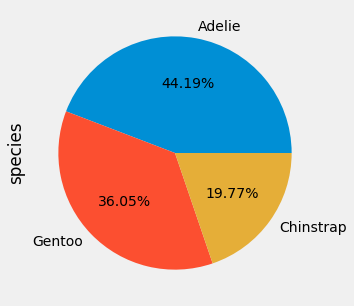

In [ ]:
Species=data.species.value_counts()
Species.plot(kind='pie',autopct="%.2f%%")

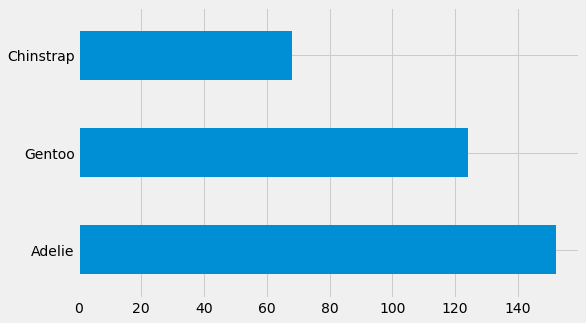

In [ ]:
#Grafik yang menunjukkan jumlah tiap spesies pinguin
data['species'].value_counts().plot(kind='barh')
plt.show()

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak?

**Jawaban :**

Dapat diamati dari output diatas bahwa, data ini berisi jumlah nilai entri yang berbeda untuk setiap spesies-nya. Dimana pada barchat spesies "Adelie" merupakan jumlah spesies terbanyak pada dataset ini yang mana sekitaran >140.

Dan juga sama halnya dengan pie chart yang mana spesies "Adelie" memiliki jumlah terbanyak dengan 44,19%.

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

Text(0.5, 1.0, 'Culmen Length vs Flipper Length')

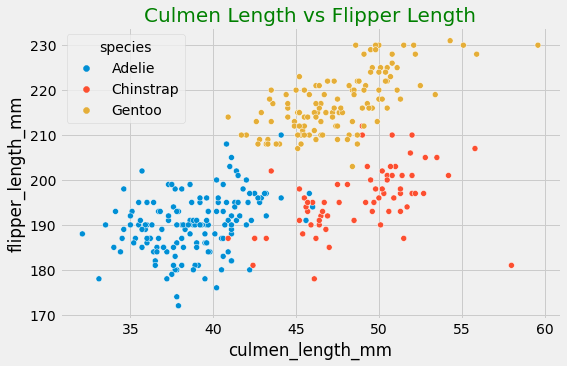

In [ ]:
#input your code here
sns.scatterplot(x="culmen_length_mm", y="flipper_length_mm", data=data, hue="species")
plt.title("Culmen Length vs Flipper Length", size=20, color="Green")

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

**Jawaban:**

Dapat dilihat dari output di atas korelasi antara culmen_length dan flipper_length tidak terlalu terlihat dimana setiap species memiliki data yang menyebar tidak berbaur datanya kepada spesies yang lain.
- Seperti spesies Adelie datanya dimana culmen_length hanya berkisaran diantara 30 - 45 mm dan flipper_length berkisaran hanya di 170 - 200 mm.
- Spesies chinstrap datanya hanya menyebar di culmen_length berkisaran 45 - 55 mm dan flipper di kisaran 180 - 210 mm yang mana pada flipper datanya memiliki korelasi dengan flipper_length yang ada pada spesies Adelie tapi tidak berkorelasi dengan culmen pada Adelie.
- Sementara spesies Gentoo data pada culmen_length hanya menyebar di 40 - 55 mm yang mana ini memiliki korelasi pada culmen_length di spesies chinstrap namun dia tidak berkorelasi untuk flipper_length yang mana nilainya tinggi sendiri berkisaran 210 -230 mm.

Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

flipper_length vs body_mass


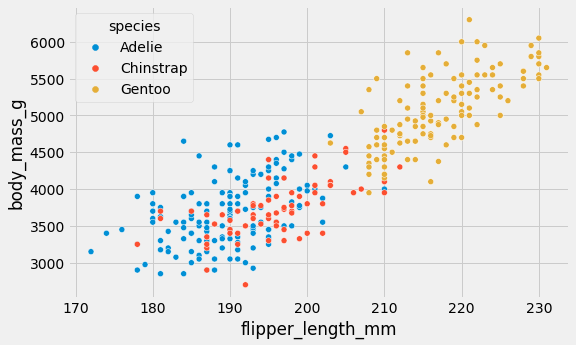

In [ ]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

**Jawaban :**

Dapat dilihat dari output di atas bahwa penyebaran antara spesies Adelie dan Chinstrap cukup memiliki korelasi yang positif artinya penyebarannya merata dimaan untuk flipper_length berkisaran antara 170 - 200 mm dan untuk body_mass berkisaran 3000 - 4500 gram. Sementara untuk spesies Gentoo dia tidak berkorelasi dengan kedua spesies lainnya dimana penyebarannya tidak merata dari kedua spesies tadi berbeda sendiri dimana pada flipper_length berkisaran 210 -230 mm dan untuk body_mass berkisaran  4000 - 6000 gram. Yang mana semakin panjang flipper maka berat body penguin juga akan semakin besar.

Tampilkan pairplot dari semua variabel!

Text(0.5, 1.1, 'Pairplot dari seluruh variabel')

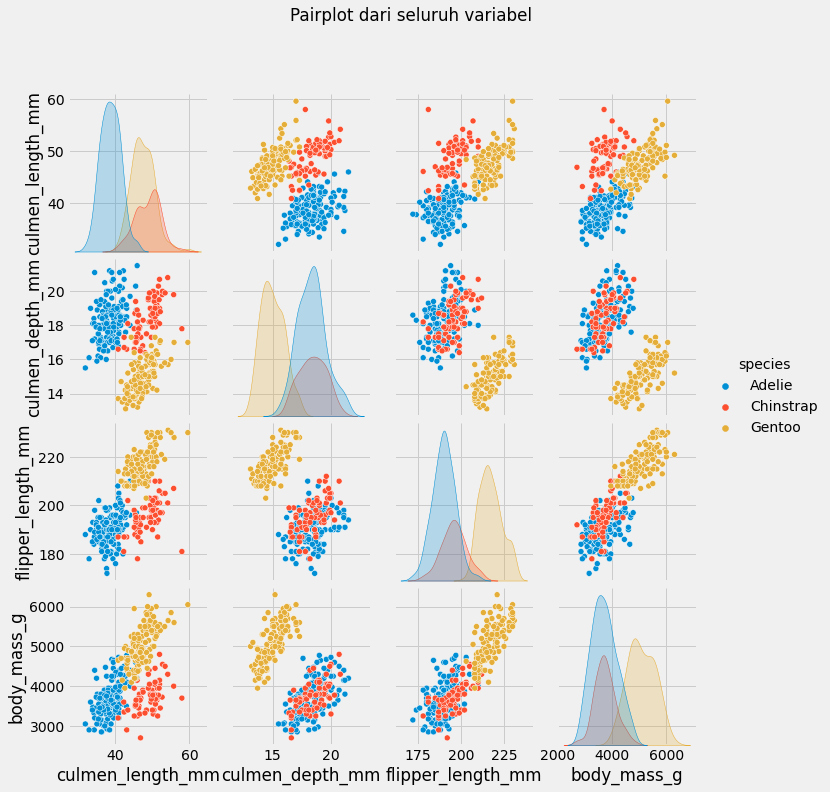

In [ ]:
#membuat pairplot dari seluruh variabel
pairplot = sns.pairplot(data, hue='species')

#menambahkan judul pada plot
pairplot.fig.suptitle('Pairplot dari seluruh variabel', y=1.1)

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?

**Jawaban :**

Dapat disimpulkan dari pairplot diatas, bisa kita perhatikan dengan mudah bahwa spesies "Gentoo" memiliki perbedaan karakter yang cukup besar jika dibandingkan dengan spesies lain, dimana spesies Gentoo memiliki panjang dan kedalaman pada culmen pinguin (culmen_length dan culmen_depth) yang lebih besar dibanding spesies lainnya yaitu "Adelie dan Chinstrap". Dan juga pada panjang sirip dan berat tubuh pinguin (flipper_length dan body_mass) pada spesies "Gentoo" juga memiliki perbedaan karakter dari spesies lainnya dimana ketika sirip semakin panjang maka berat tubuh pingun juga akan semakin berat.